In [1]:
import os
import polars as pl

# kic_filepath = "kepler-data/kic.txt"
# kic = pl.scan_csv(kic_filepath, separator='|')
# kic.collect()

In [2]:
# kic.describe()

In [3]:
kepler_planets = pl.scan_csv("kepler-data/kepler-planets.csv")
kepler_planets.collect()

pl_name,hostname,default_flag,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,soltype,pl_controv_flag,pl_refname,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,pl_orbsmaxerr1,pl_orbsmaxerr2,pl_orbsmaxlim,pl_rade,pl_radeerr1,pl_radeerr2,pl_radelim,pl_radj,pl_radjerr1,pl_radjerr2,pl_radjlim,pl_bmasse,pl_bmasseerr1,pl_bmasseerr2,pl_bmasselim,pl_bmassj,pl_bmassjerr1,pl_bmassjerr2,pl_bmassjlim,pl_bmassprov,pl_orbeccen,…,st_rad,st_raderr1,st_raderr2,st_radlim,st_mass,st_masserr1,st_masserr2,st_masslim,st_met,st_meterr1,st_meterr2,st_metlim,st_metratio,st_logg,st_loggerr1,st_loggerr2,st_logglim,sy_refname,rastr,ra,decstr,dec,sy_dist,sy_disterr1,sy_disterr2,sy_vmag,sy_vmagerr1,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2,rowupdate,pl_pubdate,releasedate
str,str,i64,i64,i64,str,i64,str,str,i64,str,f64,f64,f64,i64,f64,f64,f64,i64,f64,f64,f64,i64,f64,f64,f64,i64,f64,f64,f64,i64,f64,f64,f64,i64,str,f64,…,f64,f64,f64,i64,f64,f64,f64,i64,f64,f64,f64,i64,str,f64,f64,f64,i64,str,str,f64,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,str,str
"""KIC 10525077 b""","""KIC 10525077""",1,1,1,"""Transit""",2015,"""Kepler""","""Published Confirmed""",0,"""<a refstr=WANG_ET_AL__2015 hre…",854.083,0.01628,-0.01697,0,null,null,null,null,5.5,0.9,-0.8,0,0.490677,0.080293,-0.071371,0,null,null,null,null,null,null,null,null,null,null,…,1.01,0.1,-0.1,0,1.01,0.12,-0.12,0,-0.04,0.22,-0.3,0,"""[Fe/H]""",4.42,0.06,-0.3,0,"""<a refstr=STASSUN_ET_AL__2019 …","""19h09m30.75s""",287.378116,"""+47d46m16.15s""",47.771154,1461.15,56.0,-52.1,15.592,0.115,-0.115,13.754,0.046,-0.046,15.3043,0.000404,-0.000404,"""2015-12-24""","""2015-12""","""2016-01-05"""
"""KIC 3558849 b""","""KIC 3558849""",1,1,1,"""Transit""",2015,"""Kepler""","""Published Confirmed""",0,"""<a refstr=WANG_ET_AL__2015 hre…",1322.3,386.1,-11.2,0,null,null,null,null,6.9,1.0,-0.9,0,0.615577,0.089214,-0.080293,0,null,null,null,null,null,null,null,null,null,null,…,1.01,0.11,-0.11,0,0.98,0.11,-0.11,0,-0.42,0.28,-0.3,0,"""[Fe/H]""",4.44,0.07,-0.27,0,"""<a refstr=STASSUN_ET_AL__2019 …","""19h39m47.96s""",294.949838,"""+38d36m18.67s""",38.605187,1215.7,34.2,-32.41,14.32,0.114,-0.114,12.767,0.027,-0.027,14.1674,0.000258,-0.000258,"""2015-12-24""","""2015-12""","""2016-01-05"""
"""KIC 5437945 b""","""KIC 5437945""",1,1,2,"""Transit""",2015,"""Kepler""","""Published Confirmed""",0,"""<a refstr=WANG_ET_AL__2015 hre…",440.7813,0.00563,-0.00577,0,null,null,null,null,6.4,1.6,-1.6,0,0.57097,0.142742,-0.142742,0,null,null,null,null,null,null,null,null,null,null,…,1.24,0.29,-0.29,0,1.07,0.17,-0.17,0,-0.38,0.28,-0.3,0,"""[Fe/H]""",4.16,0.22,-0.25,0,"""<a refstr=STASSUN_ET_AL__2019 …","""19h13m53.98s""",288.474903,"""+40d39m04.63s""",40.651285,1274.01,27.92,-27.92,13.834,0.114,-0.114,12.367,0.027,-0.027,13.7506,0.00029,-0.00029,"""2015-12-24""","""2015-12""","""2016-01-05"""
"""KIC 8540376 b""","""KOI-7892""",1,1,3,"""Transit""",2015,"""Kepler""","""Published Confirmed""",0,"""<a refstr=WANG_ET_AL__2015 hre…",31.8099,0.00919,-0.00933,0,null,null,null,null,4.1,2.2,-1.9,0,0.3657775,0.196271,-0.169507,0,null,null,null,null,null,null,null,null,null,null,…,1.26,0.56,-0.56,0,1.04,0.2,-0.2,0,-0.16,0.23,-0.32,0,"""[Fe/H]""",4.31,0.1,-0.33,0,"""<a refstr=STASSUN_ET_AL__2019 …","""18h49m30.61s""",282.37754,"""+44d41m40.45s""",44.694569,1072.3,22.025,-22.025,14.411,0.114,-0.114,12.966,0.023,-0.023,14.2165,0.000257,-0.000257,"""2015-12-24""","""2015-12""","""2016-01-05"""
"""KIC 8540376 c""","""KOI-7892""",1,1,3,"""Transit""",2015,"""Kepler""","""Published Confirmed""",0,"""<a refstr=WANG_ET_AL__2015 hre…",75.2,38.9,-1.1,0,null,null,null,null,2.4,1.9,-1.4,0,0.214114,0.169507,-0.1249,0,null,null,null,null,null,null,null,null,null,null,…,1.26,0.56,-0.56,0,1.04,0.2,-0.2,0,-0.16,0.23,-0.32,0,"""[Fe/H]""",4.31,0.1,-0.33,0,"""<a refstr=STASSUN_ET_AL__2019 …","""18h49m30.61s""",282.37754,"""+44d41m40.45s""",44.694569,1072.3,22.025,-22.025,14.411,0.114,-0.114,12.966,0

In [4]:
kepler_planet_hostnames = (
    pl.scan_csv("kepler-data/kepler-planets.csv")
    .select("hostname").unique()
)

kepler_planet_hostnames.collect()


hostname
str
"""Kepler-1288"""
"""Kepler-1511"""
"""Kepler-1712"""
"""Kepler-1916"""
"""Kepler-1071"""
…
"""Kepler-845"""
"""Kepler-1901"""
"""Kepler-564"""


In [5]:
hostnames_list = pl.Series(kepler_planet_hostnames.collect()).to_list()
hostnames_list

['Kepler-1543',
 'Kepler-45',
 'Kepler-267',
 'Kepler-1726',
 'Kepler-167',
 'Kepler-1455',
 'Kepler-398',
 'Kepler-1389',
 'Kepler-42',
 'Kepler-1612',
 'Kepler-1922',
 'Kepler-1548',
 'Kepler-146',
 'Kepler-1620',
 'Kepler-255',
 'Kepler-1698',
 'Kepler-1376',
 'Kepler-351',
 'Kepler-1631',
 'Kepler-1161',
 'Kepler-263',
 'Kepler-1155',
 'Kepler-272',
 'Kepler-1299',
 'Kepler-1983',
 'Kepler-1652',
 'Kepler-290',
 'Kepler-1552',
 'Kepler-564',
 'Kepler-645',
 'Kepler-657',
 'Kepler-507',
 'KOI-1783',
 'Kepler-1500',
 'Kepler-276',
 'Kepler-1765',
 'Kepler-468',
 'Kepler-484',
 'Kepler-229',
 'Kepler-1740',
 'Kepler-198',
 'Kepler-1764',
 'Kepler-550',
 'Kepler-1220',
 'Kepler-1293',
 'Kepler-1126',
 'Kepler-610',
 'Kepler-1736',
 'Kepler-1833',
 'Kepler-660',
 'Kepler-224',
 'Kepler-1721',
 'Kepler-1373',
 'Kepler-570',
 'Kepler-1019',
 'Kepler-1643',
 'Kepler-680',
 'Kepler-206',
 'Kepler-1510',
 'Kepler-1866',
 'Kepler-236',
 'Kepler-1742',
 'Kepler-950',
 'Kepler-1797',
 'Kepler-1

In [11]:
from lightkurve import search_lightcurve

kepler_lcs = {name: search_lightcurve(name, mission="Kepler", author="Kepler") for name in hostnames_list[:1]}
kepler_lcs

{'Kepler-1543': SearchResult containing 15 data products.
 
  #       mission      year author exptime  target_name  distance
                                      s                   arcsec 
 --- ----------------- ---- ------ ------- ------------- --------
   0 Kepler Quarter 00 2009 Kepler    1800 kplr010089911      0.0
   1 Kepler Quarter 01 2009 Kepler    1800 kplr010089911      0.0
   2 Kepler Quarter 02 2009 Kepler    1800 kplr010089911      0.0
   3 Kepler Quarter 03 2009 Kepler    1800 kplr010089911      0.0
   4 Kepler Quarter 04 2010 Kepler    1800 kplr010089911      0.0
   5 Kepler Quarter 05 2010 Kepler    1800 kplr010089911      0.0
   6 Kepler Quarter 06 2010 Kepler    1800 kplr010089911      0.0
   7 Kepler Quarter 08 2011 Kepler    1800 kplr010089911      0.0
   8 Kepler Quarter 09 2011 Kepler    1800 kplr010089911      0.0
   9 Kepler Quarter 10 2011 Kepler    1800 kplr010089911      0.0
  10 Kepler Quarter 12 2012 Kepler    1800 kplr010089911      0.0
  11 Kepler Quar

In [ ]:
kepler_1543_file = kepler_lcs['Kepler-1543'].download_all()
kepler_1543_file

LightCurveCollection of 15 objects:
    0: <KeplerLightCurve LABEL="KIC 10089911" QUARTER=0 AUTHOR=Kepler FLUX_ORIGIN=pdcsap_flux>
    1: <KeplerLightCurve LABEL="KIC 10089911" QUARTER=1 AUTHOR=Kepler FLUX_ORIGIN=pdcsap_flux>
    2: <KeplerLightCurve LABEL="KIC 10089911" QUARTER=2 AUTHOR=Kepler FLUX_ORIGIN=pdcsap_flux>
    3: <KeplerLightCurve LABEL="KIC 10089911" QUARTER=3 AUTHOR=Kepler FLUX_ORIGIN=pdcsap_flux>
    4: <KeplerLightCurve LABEL="KIC 10089911" QUARTER=4 AUTHOR=Kepler FLUX_ORIGIN=pdcsap_flux>
    5: <KeplerLightCurve LABEL="KIC 10089911" QUARTER=5 AUTHOR=Kepler FLUX_ORIGIN=pdcsap_flux>
    6: <KeplerLightCurve LABEL="KIC 10089911" QUARTER=6 AUTHOR=Kepler FLUX_ORIGIN=pdcsap_flux>
    7: <KeplerLightCurve LABEL="KIC 10089911" QUARTER=8 AUTHOR=Kepler FLUX_ORIGIN=pdcsap_flux>
    8: <KeplerLightCurve LABEL="KIC 10089911" QUARTER=9 AUTHOR=Kepler FLUX_ORIGIN=pdcsap_flux>
    9: <KeplerLightCurve LABEL="KIC 10089911" QUARTER=10 AUTHOR=Kepler FLUX_ORIGIN=pdcsap_flux>
    10: <Kepl

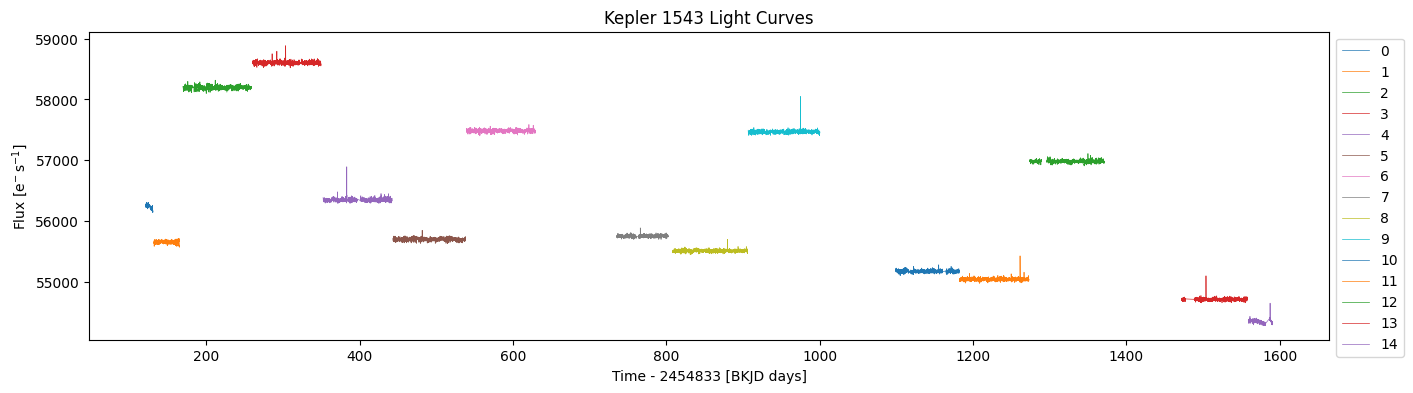

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(16, 4))
kepler_1543_file.plot(ax=ax)
ax.set_title("Kepler 1543 Light Curves")
ax.legend(range(len(kepler_1543_file)))
ax.get_legend().set_bbox_to_anchor((1, 1))
ax.get_legend().prop.set_size('xx-small')


In [64]:
normalized_lcs = [lc.normalize().remove_outliers().remove_nans() for lc in kepler_1543_file]

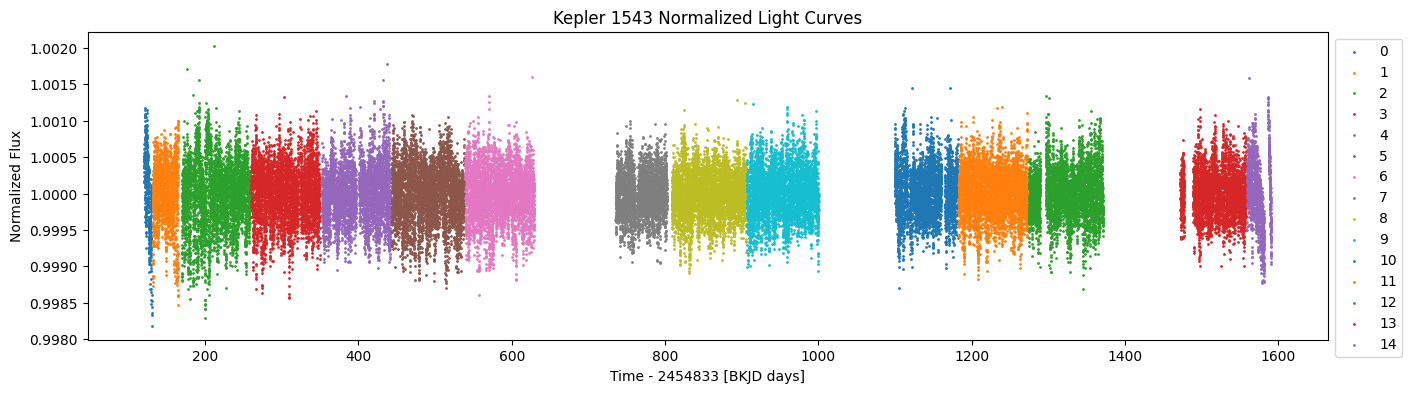

In [66]:
fig, ax = plt.subplots(figsize=(16, 4))
for lc in normalized_lcs:
    lc.scatter(ax=ax)
ax.set_title("Kepler 1543 Normalized Light Curves")
ax.legend(range(len(kepler_1543_file)))
ax.get_legend().set_bbox_to_anchor((1, 1))
ax.get_legend().prop.set_size('xx-small')


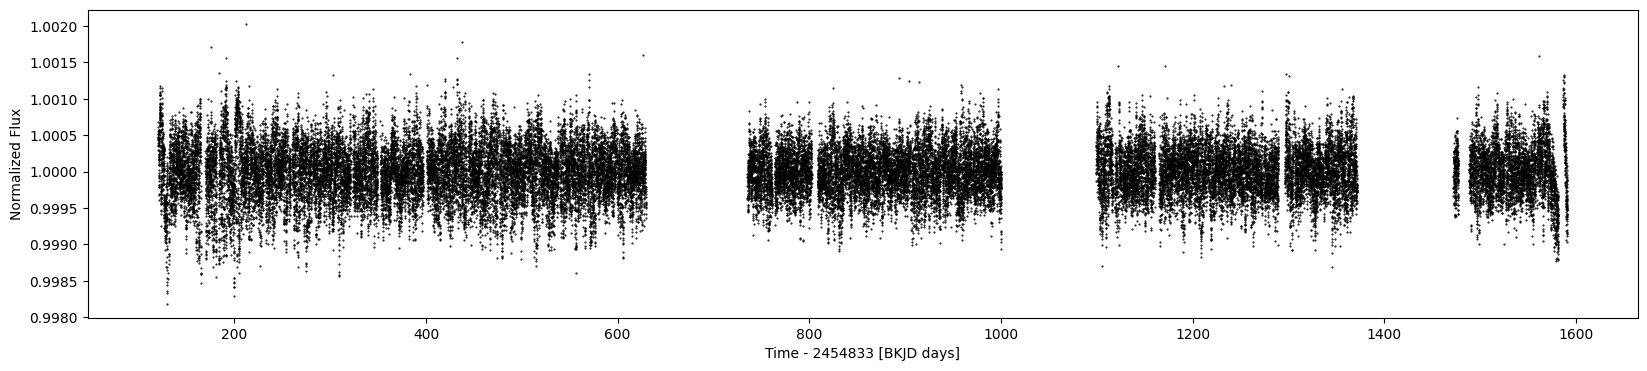

In [76]:

full_lc = normalized_lcs[0]
for lc in normalized_lcs[1:]:
    full_lc = full_lc.append(lc)

fig, ax = plt.subplots(figsize=(20, 4))
full_lc.scatter(ax=ax, color='black', marker='.', s=1)
ax.get_legend().remove()

<Axes: xlabel='Phase [JD]', ylabel='Normalized Flux'>

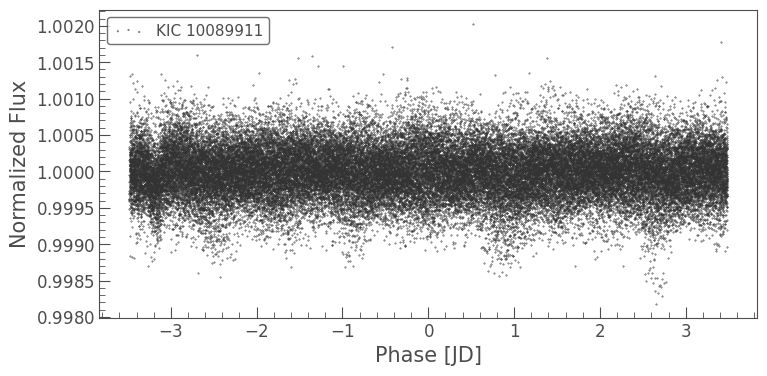

In [ ]:
full_lc.fold(period=6.967).scatter(s=0.5)

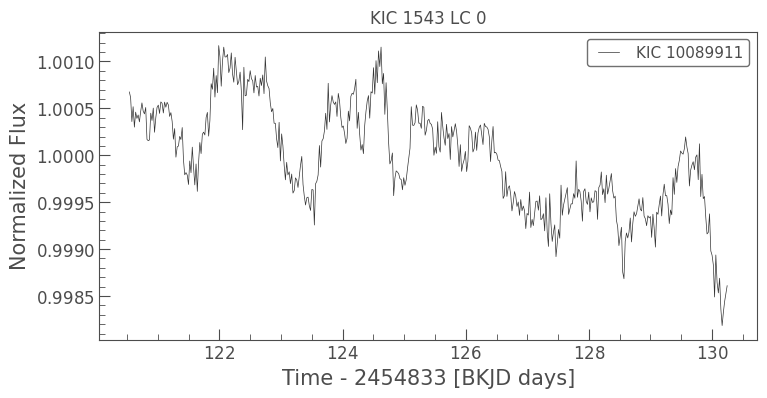

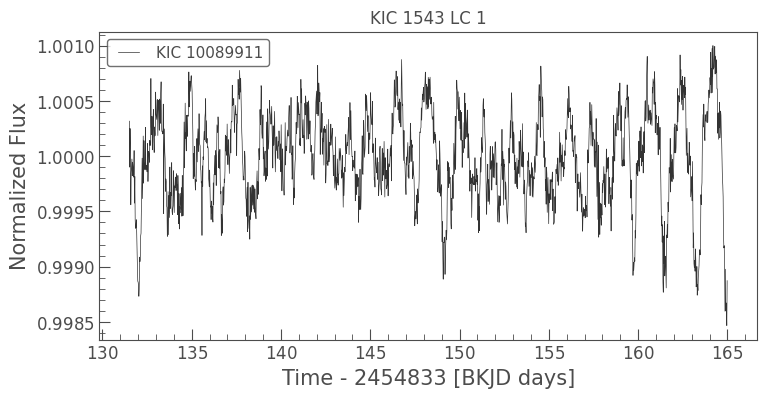

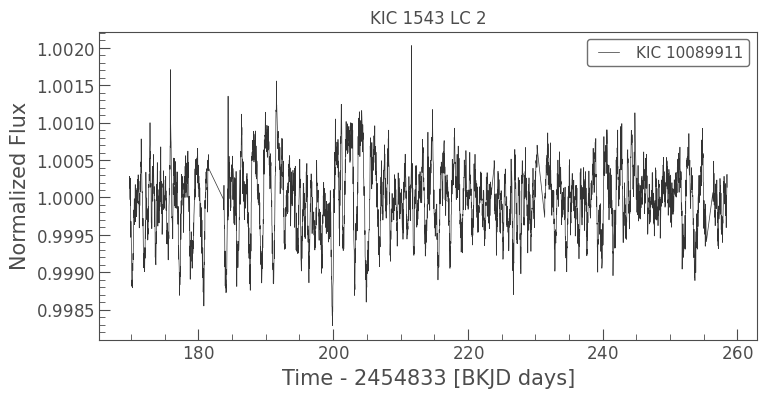

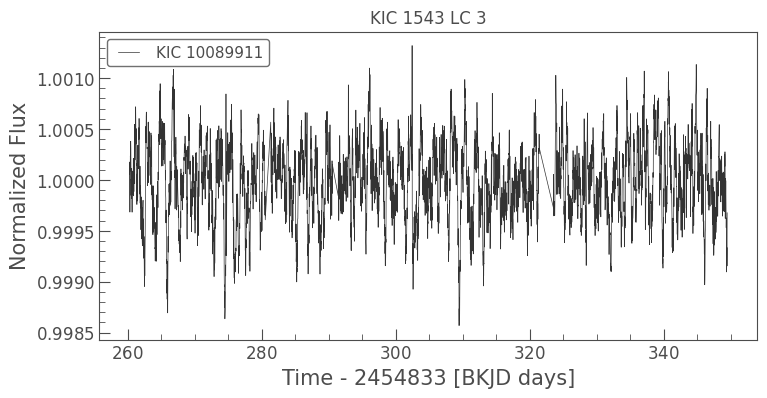

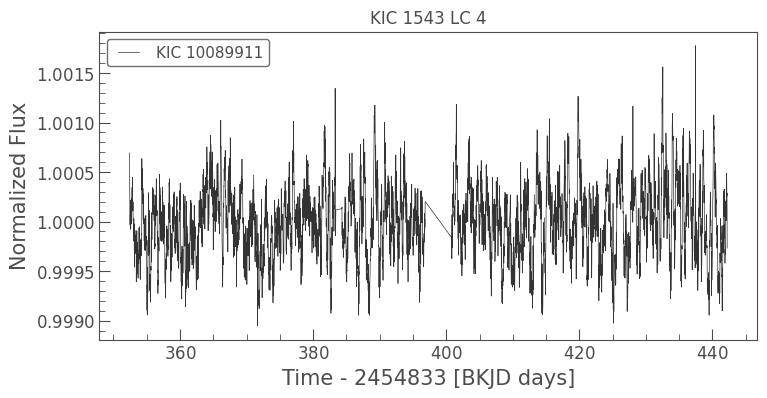

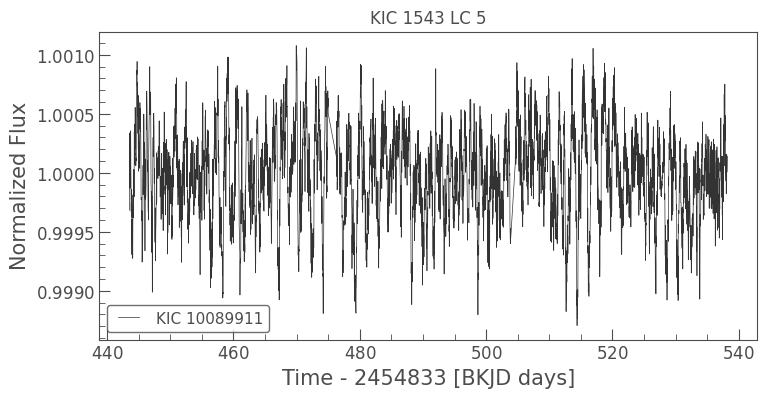

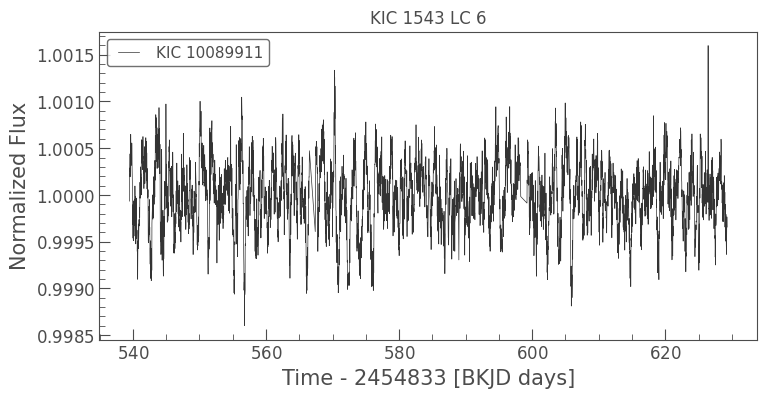

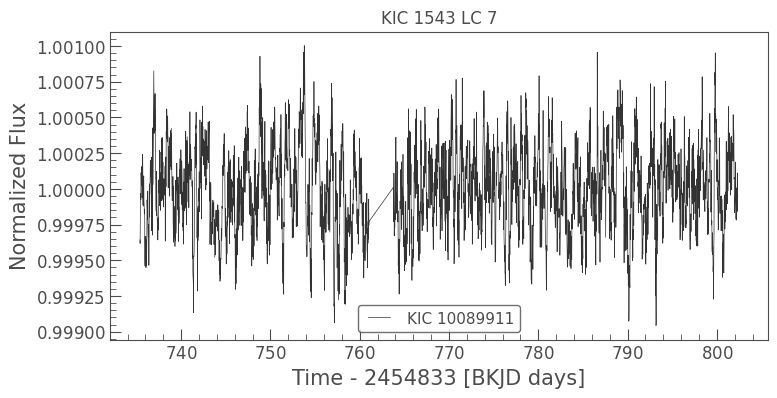

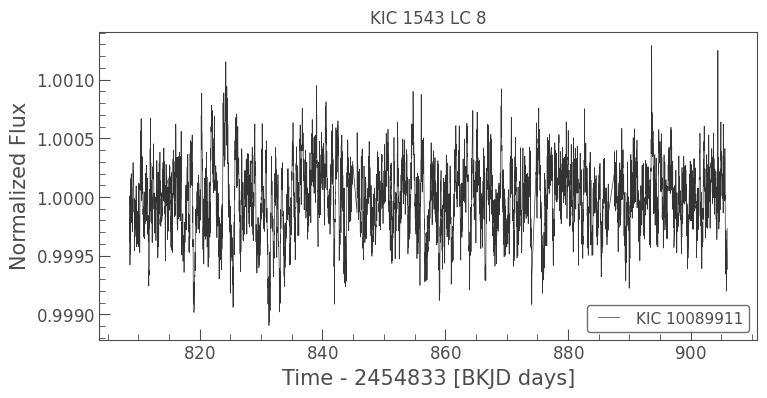

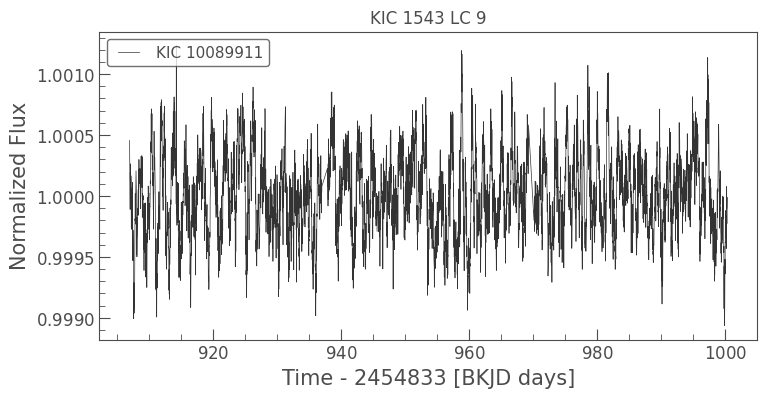

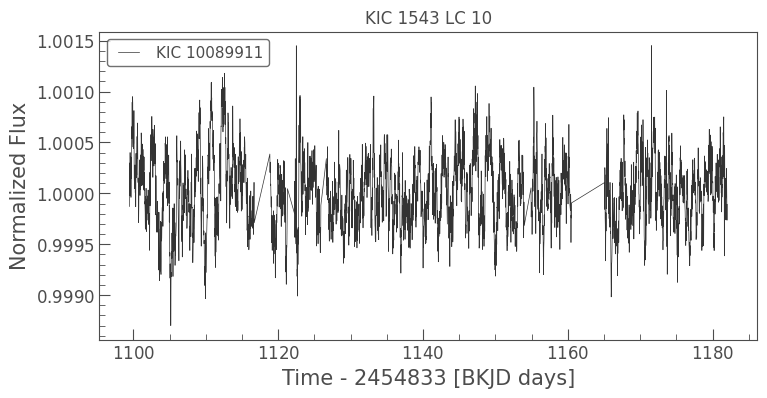

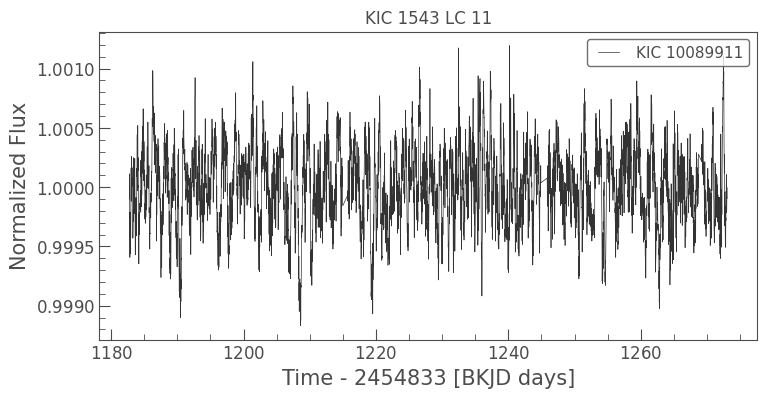

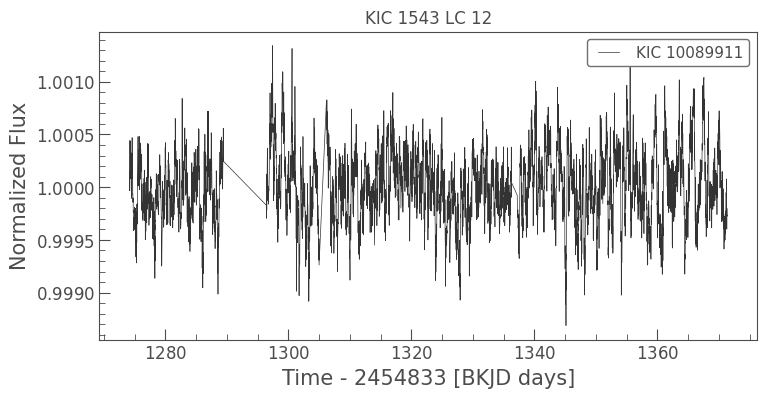

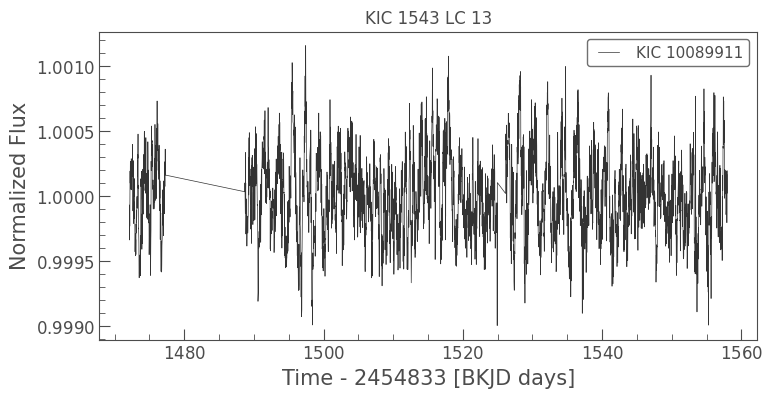

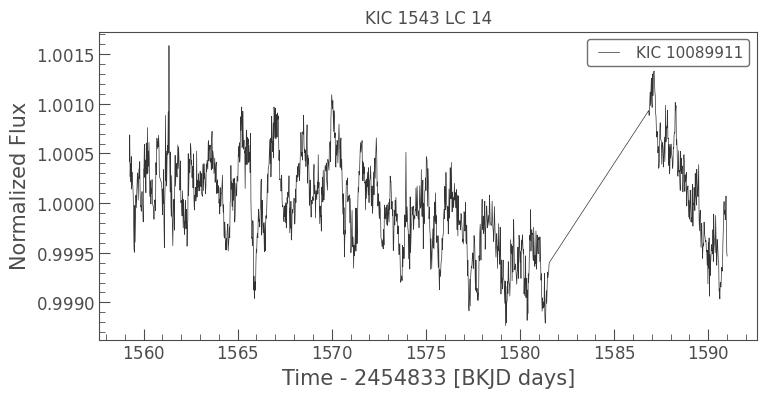

In [82]:
for i, lc in enumerate(normalized_lcs):
    processed_lc = (
        lc.remove_outliers()
        .remove_nans()
    )
    ax = processed_lc.plot()
    ax.set_title(f"KIC 1543 LC {i}")

<Axes: xlabel='Period [$\\mathrm{d}$]', ylabel='Power'>

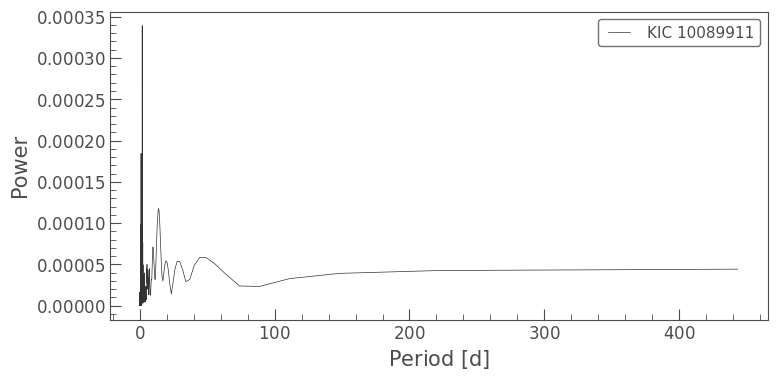

In [60]:
lc_9 = normalized_lcs[2].remove_outliers().remove_nans()
# lc_9.plot()
lc_9_period = lc_9.to_periodogram()
lc_9_period.plot(view="period")

In [61]:
lc_9_period.period_at_max_power

<Quantity 1.73927195 d>

<Axes: xlabel='Phase [JD]', ylabel='Normalized Flux'>

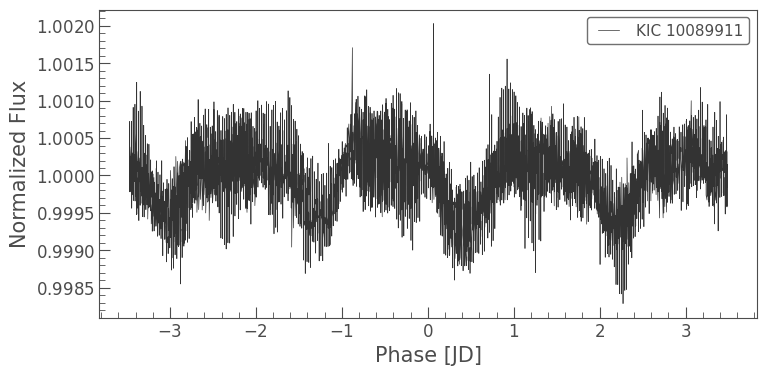

In [62]:
lc_9.fold(period=6.9671026).plot()